In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib import pyplot

In [4]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

In [5]:
selected_col = ['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'company_type_Pvt Ltd']

X_train = X_train[selected_col] 
X_test = X_test[selected_col]

# Tunning Model

In [7]:
param = []
for n_estimators in range (20,40):
    for max_depth in range (8,12):
        for random_state in range (20,40,2):
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
            result = training(X_train, X_test, Y_train, Y_test, model)
            print(n_estimators, max_depth, random_state)
            print(result['test_score'])
            print(result['train_score'])
            print()
            param.append((result['test_score'],result['train_score'],n_estimators, max_depth, random_state))

20 8 20
0.7923777084466326
0.8477338169998898

20 8 22
0.7920630348913759
0.8434935908264722

20 8 24
0.7898549532014769
0.8481670148171312

20 8 26
0.7903032601539914
0.8470476244387486

20 8 28
0.7932283467384148
0.845784672392823

20 8 30
0.7924596416406675
0.8475510211587441

20 8 32
0.7906175759223745
0.8479700444171965

20 8 34
0.7902919898674757
0.8480948627721101

20 8 36
0.7864445287231303
0.847667490116015

20 8 38
0.7921809256661991
0.8488983238224442

20 9 20
0.7860783338580875
0.8661948149075605

20 9 22
0.7865023113032029
0.8656340232174475

20 9 24
0.791090212382288
0.8649929699442472

20 9 26
0.7918156252683403
0.8679823170037619

20 9 28
0.790823840054956
0.8656825433832303

20 9 30
0.7923279760712139
0.8665288936102391

20 9 32
0.7942573417866444
0.8704046702898255

20 9 34
0.7937405186478519
0.8692766221229158

20 9 36
0.790056387211266
0.8700783242030214

20 9 38
0.7915061396227495
0.8700335961029261

20 10 20
0.7934244139451012
0.886937711186363

20 10 22
0.7888123

24 9 28
0.7907320677218994
0.8676563592610341

24 9 30
0.7926676947076167
0.8679631053938638

24 9 32
0.7927286973695509
0.8704765482096162

24 9 34
0.793316720096173
0.8693727487037132

24 9 36
0.7915195566305062
0.8712632305114721

24 9 38
0.7923022154163208
0.8708632132689952

24 10 20
0.794145712282108
0.8886320906574169

24 10 22
0.7910941480378968
0.8921673923789485

24 10 24
0.7920310129661963
0.8890400118440375

24 10 26
0.7917032801900563
0.8924113866777834

24 10 28
0.7932072373128776
0.8915953501325041

24 10 30
0.7921982783295647
0.8900576674962838

24 10 32
0.7909862752955319
0.893614933501902

24 10 34
0.7904832269513695
0.8935636949275845

24 10 36
0.7877164610584767
0.8907646250436287

24 10 38
0.7931830866989151
0.8906420567999812

24 11 20
0.7894107607980079
0.9136668171842619

24 11 22
0.7919614234192978
0.9133793740364069

24 11 24
0.791368570569883
0.9123999588538029

24 11 26
0.792955176460486
0.9134449470758982

24 11 28
0.7916678592895783
0.9117445254278908

24 

28 10 36
0.7879780032630164
0.8910798576367167

28 10 38
0.7941305063399834
0.8911952415149502

28 11 20
0.7915666056043738
0.9157096783544757

28 11 22
0.7924442568051064
0.9134419088545944

28 11 24
0.7933338938661019
0.9140180515576105

28 11 26
0.7932072373128775
0.9144353501114879

28 11 28
0.7914195551993588
0.91193279235176

28 11 30
0.7937836319661103
0.9136828763540101

28 11 32
0.7918662521109425
0.9166000827903884

28 11 34
0.7882307796891548
0.9143031874847761

28 11 36
0.7940222758107451
0.9163678644545765

28 11 38
0.7936759381171823
0.9151979550806062

29 8 20
0.7923256504565361
0.8478050210284892

29 8 22
0.7909549689440993
0.8449494128157611

29 8 24
0.7899451154936028
0.8486435129988927

29 8 26
0.7913376220053238
0.8479818432239886

29 8 28
0.7934426610756505
0.8475871028921971

29 8 30
0.7927850488021296
0.8489712068680797

29 8 32
0.7919578455505625
0.8491342656926357

29 8 34
0.792074841858202
0.8502699893659971

29 8 36
0.7891683601912013
0.8494881842088654

29 8

33 8 24
0.7902120245012451
0.8486383617289379

33 8 26
0.7921660775109483
0.8480230076960887

33 8 28
0.7934152903798265
0.848601686057486

33 8 30
0.7928313822022498
0.8486687096763215

33 8 32
0.7919208146091536
0.8499716497402331

33 8 34
0.7917268941237083
0.8506955802080943

33 8 36
0.7897921616051751
0.8503147288879771

33 8 38
0.7913776941351575
0.8492288388971275

33 9 20
0.7900658685634142
0.8701019675041445

33 9 22
0.7891733692074306
0.8674773097980376

33 9 24
0.7935653819732662
0.8688810708373176

33 9 26
0.7921705498468673
0.8718533650231237

33 9 28
0.7911646320519794
0.8703254823638906

33 9 30
0.7936201233649138
0.8701614869447972

33 9 32
0.7932458782952171
0.871397620405681

33 9 34
0.7925424693018863
0.8703658929916069

33 9 36
0.7925650098749176
0.8725750111140649

33 9 38
0.7915771603171423
0.8714594813326773

33 10 20
0.7950872284397629
0.8896659196982576

33 10 22
0.7928966783066663
0.8920123402954976

33 10 24
0.7941703995763805
0.8917949932534354

33 10 26
0.7

37 9 32
0.7934158270601368
0.871870851928447

37 9 34
0.7933156467355525
0.8705314417870059

37 9 36
0.793703487706443
0.8721748910746264

37 9 38
0.7920279717777714
0.8716166807304331

37 10 20
0.7955235495320147
0.8904271883068777

37 10 22
0.7931351432578643
0.8932935787786684

37 10 24
0.7945399934167215
0.8922678250102404

37 10 26
0.7922730557861292
0.8940203418739104

37 10 28
0.7931725319861466
0.892320491320133

37 10 30
0.793362516815983
0.8919329010881012

37 10 32
0.7929381815839941
0.8931205372269716

37 10 34
0.7915946918739446
0.8952335287686319

37 10 36
0.7894912628445487
0.8934467119855066

37 10 38
0.7958045911211609
0.8917107454326224

37 11 20
0.7931521381343561
0.9170633201641287

37 11 22
0.7934603715258894
0.913824130800864

37 11 24
0.7932759323925923
0.9156675430221844

37 11 26
0.7928206485960443
0.9156691078203747

37 11 28
0.7937832741792369
0.9145723784610396

37 11 30
0.7949908048773505
0.9153752341514898

37 11 32
0.7935431991871083
0.9173068347438105

3

In [8]:
param.sort()
param[::-1]

[(0.7962768697942009, 0.8917214020509546, 35, 10, 38),
 (0.7961301771760597, 0.892519369174796, 39, 10, 38),
 (0.7961076366030282, 0.8915525180652524, 30, 10, 38),
 (0.7961040587342931, 0.8916872963035378, 36, 10, 38),
 (0.7960367948020723, 0.8913507733175547, 29, 10, 38),
 (0.7959650585339326, 0.8921402996686764, 38, 10, 38),
 (0.7958262372270086, 0.8901208419400088, 39, 10, 20),
 (0.7958045911211609, 0.8917107454326224, 37, 10, 38),
 (0.7957725691959814, 0.9155124109855413, 38, 11, 30),
 (0.7956963605919226, 0.8903086291447249, 38, 10, 20),
 (0.7956904571085096, 0.8904908881572944, 36, 10, 20),
 (0.7955276640810601, 0.9157324878580226, 39, 11, 30),
 (0.7955235495320147, 0.8904271883068777, 37, 10, 20),
 (0.7955008300655466, 0.8911010452326503, 31, 10, 38),
 (0.7954260526089819, 0.890019929589564, 35, 10, 20),
 (0.795404585396571, 0.8917297286048285, 34, 10, 38),
 (0.7953680911354725, 0.8911757900454759, 32, 10, 38),
 (0.7953383948249708, 0.8898048440806529, 34, 10, 20),
 (0.795230700

# Importance feature

test_score:  0.7916154435126084
train_score:  0.8924947435915973
city_development_index
Feature: 0, Score: 0.42307
gender
Feature: 1, Score: 0.02141
relevent_experience
Feature: 2, Score: 0.02370
enrolled_university
Feature: 3, Score: 0.02987
education_level
Feature: 4, Score: 0.06558
experience
Feature: 5, Score: 0.09713
company_size
Feature: 6, Score: 0.13262
last_new_job
Feature: 7, Score: 0.04492
training_hours
Feature: 8, Score: 0.10332
company_type_Pvt Ltd
Feature: 9, Score: 0.05839


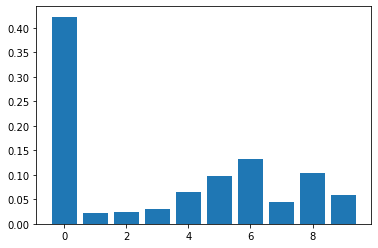

In [6]:
model = RandomForestClassifier(n_estimators=35, max_depth=10)
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])
importance = model.feature_importances_

for i,v in enumerate(importance):
    print(X_train.columns[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Scoring Model

In [7]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')[selected_col] 
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.7982628827716964


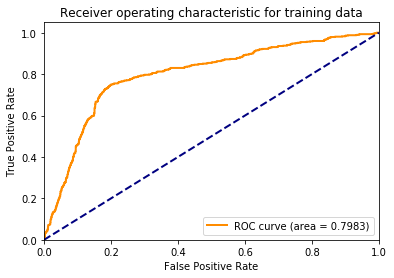

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()